In [175]:
import numpy as np
import pandas as pd
import wandb
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gmean


### ELSA base ---> Spread mSearch + Rands

In [176]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSA_base_fixed")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

239it [00:02, 129.98it/s]wandb: Network error (HTTPError), entering retry loop.
743it [00:14, 129.31it/s]wandb: Network error (HTTPError), entering retry loop.
1447it [00:30, 131.59it/s]wandb: Network error (HTTPError), entering retry loop.
1806it [00:41, 43.17it/s] 


In [177]:
df=df.dropna()

In [178]:
bt = df[df.algo == "bt"]
vicreg = df[df.algo == "vicreg"]

bt_1 = bt[bt.no_seeds == 1]
bt_2 = bt[bt.no_seeds == 2]
bt_5 = bt[bt.no_seeds == 5]
bt_10 = bt[bt.no_seeds == 10]
bt_50 = bt[bt.no_seeds == 50]

vicreg_1 = vicreg[vicreg.no_seeds == 1]
vicreg_2 = vicreg[vicreg.no_seeds== 2]
vicreg_5 = vicreg[vicreg.no_seeds== 5]
vicreg_10 = vicreg[vicreg.no_seeds == 10]
vicreg_50 = vicreg[vicreg.no_seeds == 50]

In [179]:
import numpy as np

def print_scores(seeds, algorithm, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Algorithm ---- > {algorithm}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")


def gm(a,b):
    return (a*b) ** 0.5
# # Seed 1
# print_scores(1, "Barlow Twin", np.median(bt_1["Final Labelling Efficiency"]), np.median(bt_1["Final Percentage Discovery"]))
print_scores(1, "VICReg", np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))

# # Seed 2
# print_scores(2, "Barlow Twin", np.median(bt_2["Final Labelling Efficiency"]), np.median(bt_2["Final Percentage Discovery"]))
print_scores(2, "VICReg", np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))

# # Seed 5
# print_scores(5, "Barlow Twin", np.median(bt_5["Final Labelling Efficiency"]), np.median(bt_5["Final Percentage Discovery"]))
print_scores(5, "VICReg", np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))

# # Seed 10
# print_scores(10, "Barlow Twin", np.median(bt_10["Final Labelling Efficiency"]), np.median(bt_10["Final Percentage Discovery"]))
print_scores(10, "VICReg", np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))

# # Seed 50
# print_scores(50, "Barlow Twin", np.median(bt_50["Final Labelling Efficiency"]), np.median(bt_50["Final Percentage Discovery"]))
print_scores(50, "VICReg", np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))

score_base = {
    1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
    2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
    5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
    10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
    50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
}

score_base_tot = {
    1: [np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])], 
    2: [np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])],
    5: [np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])],
    10: [np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])],
    50: [np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])],
}

Seeds ---- > 1
Algorithm ---- > VICReg
Le 0.12040974101275607
Dr 0.8861538461538462
Composite 0.3266520398112375
Seeds ---- > 2
Algorithm ---- > VICReg
Le 0.12054613671363645
Dr 0.8819230769230769
Composite 0.3260558538067982
Seeds ---- > 5
Algorithm ---- > VICReg
Le 0.1159952280444159
Dr 0.8659392049883087
Composite 0.3169303007842877
Seeds ---- > 10
Algorithm ---- > VICReg
Le 0.11410128193472134
Dr 0.8713951675759938
Composite 0.31532095663330434
Seeds ---- > 50
Algorithm ---- > VICReg
Le 0.10588443879407068
Dr 0.8969230769230769
Composite 0.3081723489241874


### ELSA base ---> Spread Search + Rands +NO ACTIVE LEARNING

In [180]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSA_no_ac_fixed")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

293it [00:02, 131.53it/s]wandb: Network error (HTTPError), entering retry loop.
597it [00:19, 24.81it/s] wandb: Network error (HTTPError), entering retry loop.
1139it [00:32, 125.32it/s]wandb: Network error (HTTPError), entering retry loop.
1749it [00:49, 125.35it/s]wandb: Network error (HTTPError), entering retry loop.
2437it [01:03, 115.82it/s]wandb: Network error (HTTPError), entering retry loop.
2500it [01:11, 34.83it/s] 


In [181]:
df=df.dropna()

In [182]:
bt = df[df.algo == "bt"]
vicreg = df[df.algo == "vicreg"]

bt_1 = bt[bt.no_seeds == 1]
bt_2 = bt[bt.no_seeds == 2]
bt_5 = bt[bt.no_seeds == 5]
bt_10 = bt[bt.no_seeds == 10]
bt_50 = bt[bt.no_seeds == 50]

vicreg_1 = vicreg[vicreg.no_seeds == 1]
vicreg_2 = vicreg[vicreg.no_seeds== 2]
vicreg_5 = vicreg[vicreg.no_seeds== 5]
vicreg_10 = vicreg[vicreg.no_seeds == 10]
vicreg_50 = vicreg[vicreg.no_seeds == 50]

In [183]:
import numpy as np

def print_scores(seeds, algorithm, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Algorithm ---- > {algorithm}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")

# # Seed 1
# print_scores(1, "Barlow Twin", np.median(bt_1["Final Labelling Efficiency"]), np.median(bt_1["Final Percentage Discovery"]))
print_scores(1, "VICReg", np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))

# # Seed 2
# print_scores(2, "Barlow Twin", np.median(bt_2["Final Labelling Efficiency"]), np.median(bt_2["Final Percentage Discovery"]))
print_scores(2, "VICReg", np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))

# # Seed 5
# print_scores(5, "Barlow Twin", np.median(bt_5["Final Labelling Efficiency"]), np.median(bt_5["Final Percentage Discovery"]))
print_scores(5, "VICReg", np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))

# # Seed 10
# print_scores(10, "Barlow Twin", np.median(bt_10["Final Labelling Efficiency"]), np.median(bt_10["Final Percentage Discovery"]))
print_scores(10, "VICReg", np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))

# # Seed 50
# print_scores(50, "Barlow Twin", np.median(bt_50["Final Labelling Efficiency"]), np.median(bt_50["Final Percentage Discovery"]))
print_scores(50, "VICReg", np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))

score_elsa_noac = {
    1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
    2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
    5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
    10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
    50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
}

score_elsa_noac_tot = {
    1: [np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])], 
    2: [np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])],
    5: [np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])],
    10: [np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])],
    50: [np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])],
}

Seeds ---- > 1
Algorithm ---- > VICReg
Le 0.034083442838370566
Dr 0.8538461538461538
Composite 0.17059313168289614
Seeds ---- > 2
Algorithm ---- > VICReg
Le 0.03520665545377573
Dr 0.8815384615384616
Composite 0.1761704313573539
Seeds ---- > 5
Algorithm ---- > VICReg
Le 0.0338107639692513
Dr 0.8842307692307693
Composite 0.1729060954183254
Seeds ---- > 10
Algorithm ---- > VICReg
Le 0.03395283176186234
Dr 0.8915384615384616
Composite 0.17398349172793656
Seeds ---- > 50
Algorithm ---- > VICReg
Le 0.02829547660648418
Dr 0.9353846153846154
Composite 0.16268728746488026


### ELSA 2 COMPONENT

In [184]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSAC_fixed")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep2':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

495it [00:06, 127.85it/s]wandb: Network error (HTTPError), entering retry loop.
1244it [00:21, 116.22it/s]wandb: Network error (HTTPError), entering retry loop.
1250it [00:29, 42.99it/s] 


In [185]:
df=df.dropna()

In [186]:
vicreg = df[df.algo == "vicreg"]

vicreg_1 = vicreg[vicreg.no_seeds == 1]
vicreg_2 = vicreg[vicreg.no_seeds== 2]
vicreg_5 = vicreg[vicreg.no_seeds== 5]
vicreg_10 = vicreg[vicreg.no_seeds == 10]
vicreg_50 = vicreg[vicreg.no_seeds == 50]

In [187]:
import numpy as np

def print_scores(seeds, algorithm, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Algorithm ---- > {algorithm}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")

print_scores(1, "VICReg", np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))
print_scores(2, "VICReg", np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))
print_scores(5, "VICReg", np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))
print_scores(10, "VICReg", np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))
print_scores(50, "VICReg", np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))

score_2c = {
    1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
    2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
    5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
    10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
    50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
}
score_2c_tot = {
    1: [np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])], 
    2: [np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])],
    5: [np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])],
    10: [np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])],
    50: [np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])],
}

Seeds ---- > 1
Algorithm ---- > VICReg
Le 0.09934634294288144
Dr 0.8803846153846153
Composite 0.2957414274693973
Seeds ---- > 2
Algorithm ---- > VICReg
Le 0.0967525625311022
Dr 0.868225041571719
Composite 0.28983270627335445
Seeds ---- > 5
Algorithm ---- > VICReg
Le 0.0913350644770904
Dr 0.8680769230769231
Composite 0.28157745247143817
Seeds ---- > 10
Algorithm ---- > VICReg
Le 0.0889448772254076
Dr 0.874179507164698
Composite 0.27884366397272037
Seeds ---- > 50
Algorithm ---- > VICReg
Le 0.0718354066708683
Dr 0.91
Composite 0.255676006051585


### ELSA 3 Component

In [188]:
api = wandb.Api()
runs = api.runs(path="dc250601/ELSA2C")

df = pd.DataFrame()
for i,run in tqdm(enumerate(runs)):
    try:
        if run.sweep.name == 'main-sweep2':
            for key in run.config.keys():
                df.loc[i,key] = run.config.get(key)
            for key in ["Final Labelling Efficiency","Final Percentage Discovery"]:
                df.loc[i,key] = run.summary.get(key)
    #     print(key,run.config.get(key))
    except:
        continue

735it [00:07, 122.11it/s]wandb: Network error (HTTPError), entering retry loop.
1385it [00:22, 117.11it/s]wandb: Network error (HTTPError), entering retry loop.
2087it [00:38, 114.91it/s]wandb: Network error (HTTPError), entering retry loop.
2747it [00:53, 112.33it/s]wandb: Network error (HTTPError), entering retry loop.
3241it [01:07, 107.11it/s]wandb: Network error (HTTPError), entering retry loop.
3949it [01:22, 117.75it/s]wandb: Network error (HTTPError), entering retry loop.
4444it [01:37, 48.20it/s] wandb: Network error (HTTPError), entering retry loop.
4986it [01:52, 101.81it/s]wandb: Network error (HTTPError), entering retry loop.
5648it [02:07, 111.17it/s]wandb: Network error (HTTPError), entering retry loop.
6140it [02:22, 75.05it/s] wandb: Network error (HTTPError), entering retry loop.
6589it [02:35, 96.89it/s] wandb: Network error (HTTPError), entering retry loop.
7138it [02:50, 94.02it/s] wandb: Network error (HTTPError), entering retry loop.
7789it [03:07, 90.25it/s] wan

In [189]:
df = df.dropna()

In [190]:

zeta = list(set(list(df["zeta"])))
zeta.sort()

In [191]:
def print_scores(seeds, zeta, le, dr):
    composite_score = (le * dr) ** 0.5
    print(f"Seeds ---- > {seeds}")
    print(f"Zeta ---- > {zeta}")
    print("Le", le)
    print("Dr", dr)
    print("Composite", composite_score)
    print("=================================================")



In [192]:
zeta

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [193]:
print("ALL STATS FOR VICREG")
score_3c = {}
score_3c_tot = {}
for z in zeta:
    print("==============================================")
    print("==============================================")
    print("==============================================")
    vicreg = df[df.algo == "vicreg"]
    vicreg = vicreg[vicreg.zeta == z]
    vicreg_1 = vicreg[vicreg.no_seeds == 1]
    vicreg_2 = vicreg[vicreg.no_seeds== 2]
    vicreg_5 = vicreg[vicreg.no_seeds== 5]
    vicreg_10 = vicreg[vicreg.no_seeds == 10]
    vicreg_50 = vicreg[vicreg.no_seeds == 50]
    
    print_scores(1, z, np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"]))
    print_scores(2, z, np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"]))
    print_scores(5, z, np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"]))
    print_scores(10, z, np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"]))
    print_scores(50, z, np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"]))
    print("==============================================")
    print("==============================================")
    print("==============================================")
    
    score_3c[z] = {
            1: gm(np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])), 
            2: gm(np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])),
            5: gm(np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])),
            10: gm(np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])),
            50: gm(np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])),
            }
    score_3c_tot[z] = {
            1: [np.median(vicreg_1["Final Labelling Efficiency"]), np.median(vicreg_1["Final Percentage Discovery"])], 
            2: [np.median(vicreg_2["Final Labelling Efficiency"]), np.median(vicreg_2["Final Percentage Discovery"])],
            5: [np.median(vicreg_5["Final Labelling Efficiency"]), np.median(vicreg_5["Final Percentage Discovery"])],
            10: [np.median(vicreg_10["Final Labelling Efficiency"]), np.median(vicreg_10["Final Percentage Discovery"])],
            50: [np.median(vicreg_50["Final Labelling Efficiency"]), np.median(vicreg_50["Final Percentage Discovery"])],
            }

ALL STATS FOR VICREG
Seeds ---- > 1
Zeta ---- > 0.1
Le 0.03822675362477324
Dr 0.8575391210504226
Composite 0.1810550653917175
Seeds ---- > 2
Zeta ---- > 0.1
Le 0.03782725124422536
Dr 0.8603846153846153
Composite 0.18040505816861135
Seeds ---- > 5
Zeta ---- > 0.1
Le 0.03931604910797077
Dr 0.8630769230769231
Composite 0.1842085087384636
Seeds ---- > 10
Zeta ---- > 0.1
Le 0.038252809063762924
Dr 0.8830769230769231
Composite 0.18379383266877264
Seeds ---- > 50
Zeta ---- > 0.1
Le 0.03247534895633244
Dr 0.9329696024941544
Composite 0.1740646816750843
Seeds ---- > 1
Zeta ---- > 0.2
Le 0.04991126885536824
Dr 0.8853846153846154
Composite 0.21021576910134107
Seeds ---- > 2
Zeta ---- > 0.2
Le 0.05149723478435673
Dr 0.8926923076923077
Composite 0.21440892089514368
Seeds ---- > 5
Zeta ---- > 0.2
Le 0.04938808657886373
Dr 0.8796153846153847
Composite 0.20842869469313755
Seeds ---- > 10
Zeta ---- > 0.2
Le 0.050450013061944
Dr 0.8846153846153846
Composite 0.2112554323766439
Seeds ---- > 50
Zeta ---- >

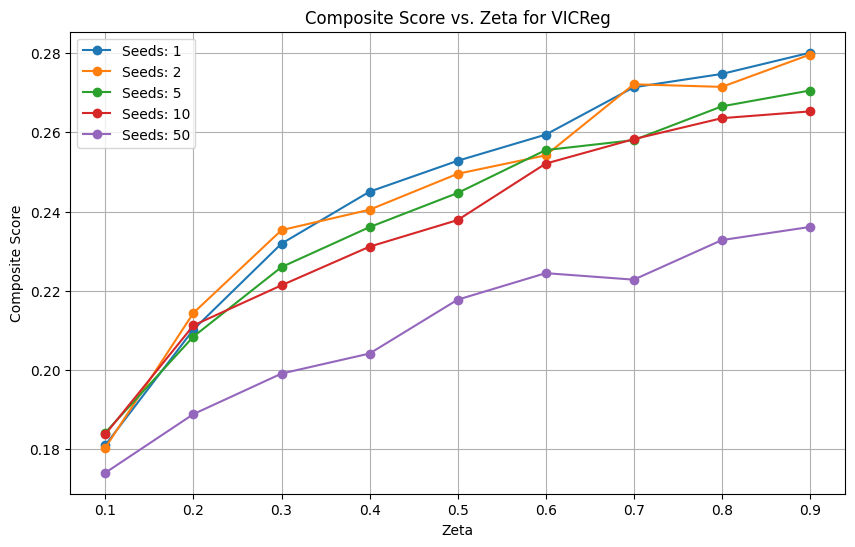

In [194]:
# Initialize lists to store zeta values and corresponding composite scores
zeta_values = []
composite_scores_by_seeds = {1: [], 2: [], 5: [], 10: [], 50: []}

# Loop through each zeta value
for z in zeta:
    zeta_values.append(z)
    
    vicreg = df[(df.algo == "vicreg") & (df.zeta == z)]
    
    # Calculate composite scores for different seeds
    for seeds in [1, 2, 5, 10, 50]:
        vicreg_seeds = vicreg[vicreg.no_seeds == seeds]
        le = np.median(vicreg_seeds["Final Labelling Efficiency"])
        dr = np.median(vicreg_seeds["Final Percentage Discovery"])
        composite_score = (le * dr) ** 0.5
        composite_scores_by_seeds[seeds].append(composite_score)


# Plot the results
plt.figure(figsize=(10, 6))
for seeds, scores in composite_scores_by_seeds.items():
    plt.plot(zeta_values, scores, label=f'Seeds: {seeds}', marker='o')

# Customize the plot
plt.title('Composite Score vs. Zeta for VICReg')
plt.xlabel('Zeta')
plt.ylabel('Composite Score')
plt.legend()
plt.grid(True)
plt.show()

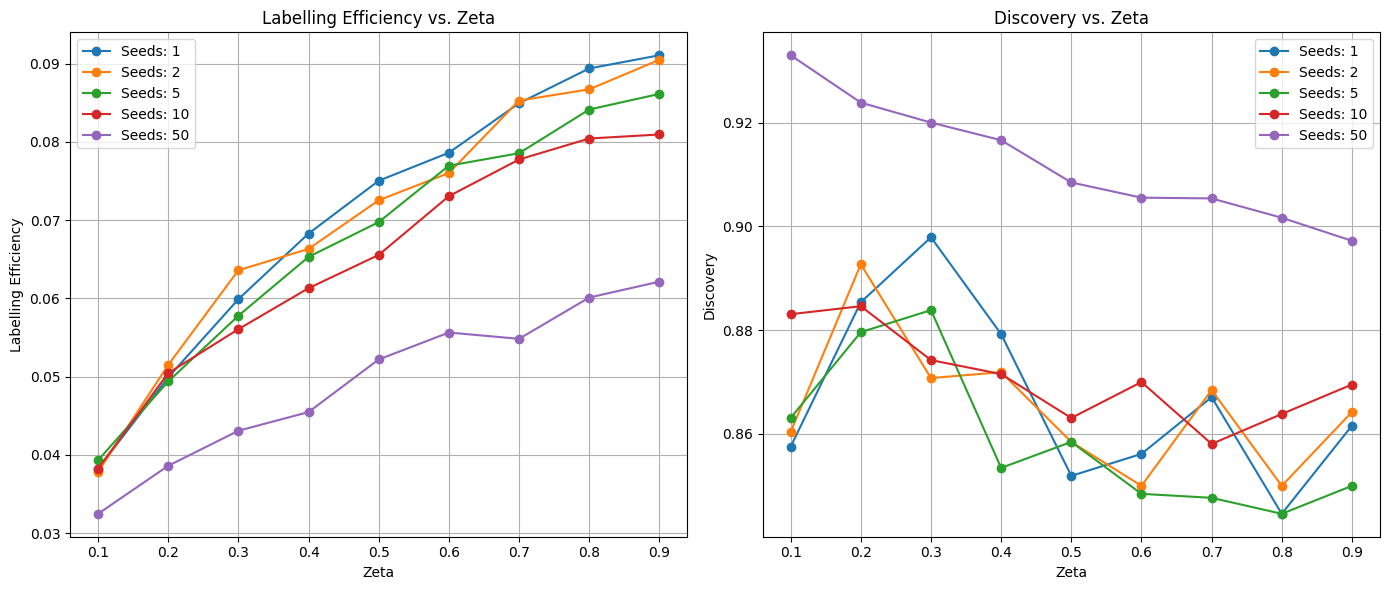

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store zeta values and corresponding scores for labelling efficiency and discovery
zeta_values = []
labelling_efficiency_by_seeds = {1: [], 2: [], 5: [], 10: [], 50: []}
discovery_by_seeds = {1: [], 2: [], 5: [], 10: [], 50: []}

# Loop through each zeta value
for z in zeta:
    zeta_values.append(z)
    
    vicreg = df[(df.algo == "vicreg") & (df.zeta == z)]
    
    # Collect labelling efficiency and discovery scores for different seeds
    for seeds in [1, 2, 5, 10, 50]:
        vicreg_seeds = vicreg[vicreg.no_seeds == seeds]
        le = np.median(vicreg_seeds["Final Labelling Efficiency"])
        dr = np.median(vicreg_seeds["Final Percentage Discovery"])
        
        labelling_efficiency_by_seeds[seeds].append(le)
        discovery_by_seeds[seeds].append(dr)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Labelling Efficiency
for seeds, le_scores in labelling_efficiency_by_seeds.items():
    axes[0].plot(zeta_values, le_scores, label=f'Seeds: {seeds}', marker='o')

axes[0].set_title('Labelling Efficiency vs. Zeta')
axes[0].set_xlabel('Zeta')
axes[0].set_ylabel('Labelling Efficiency')
axes[0].legend()
axes[0].grid(True)

# Plot for Discovery
for seeds, dr_scores in discovery_by_seeds.items():
    axes[1].plot(zeta_values, dr_scores, label=f'Seeds: {seeds}', marker='o')

    

axes[1].set_title('Discovery vs. Zeta')
axes[1].set_xlabel('Zeta')
axes[1].set_ylabel('Discovery')
axes[1].legend()
axes[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()


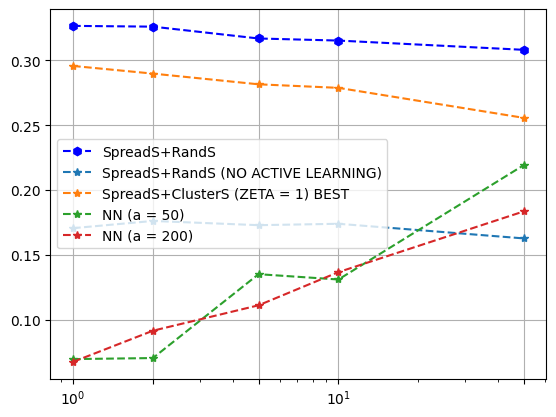

In [196]:
### NN

# GM scores for VICReg (a = 50)
gm_scores_a_50 = {
    1: 0.0696,
    2: 0.0704,
    5: 0.1351,
    10: 0.1310,
    50: 0.2193
}

# GM scores for VICReg (a = 200)
gm_scores_a_200 = {
    1: 0.06745,
    2: 0.09149,
    5: 0.11109,
    10: 0.13668,
    50: 0.18358
}

######

# Plotting ELSA BASE
seeds = list(score_base.keys())
composite_scores = list(score_base.values())

# plt.figure(figsize=(10, 6))
plt.xscale("log")
plt.xticks([1,2,5,10,50])


plt.plot(seeds, composite_scores, marker='h', linestyle='--', color='b',label="SpreadS+RandS")

# Plotting ELSA No Ac
seeds = list(score_elsa_noac.keys())
composite_scores = list(score_elsa_noac.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="SpreadS+RandS (NO ACTIVE LEARNING)")

# Plotting ELSA 2 Component
seeds = list(score_2c.keys())
composite_scores = list(score_2c.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="SpreadS+ClusterS (ZETA = 1) BEST")
# Plotting NN
seeds = list(gm_scores_a_50.keys())
composite_scores = list(gm_scores_a_50.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="NN (a = 50)")
# Plotting NN_Large
# Plotting NN
seeds = list(gm_scores_a_200.keys())
composite_scores = list(gm_scores_a_200.values())
plt.plot(seeds, composite_scores, marker='*', linestyle='--',label="NN (a = 200)")
plt.legend()
plt.grid()


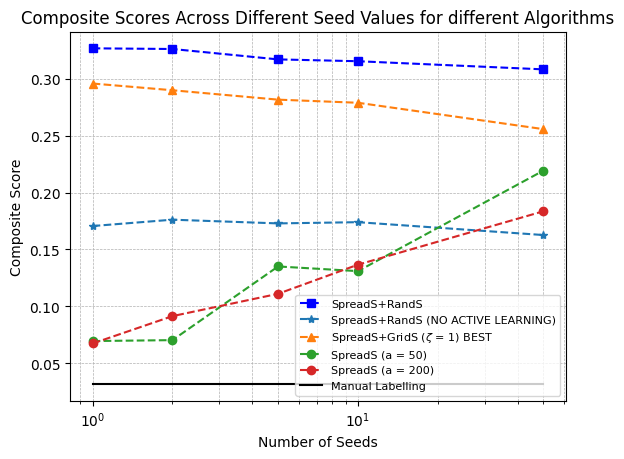

In [230]:
import matplotlib.pyplot as plt

# GM scores for VICReg (a = 50)
gm_scores_a_50 = {
    1: 0.0696,
    2: 0.0704,
    5: 0.1351,
    10: 0.1310,
    50: 0.2193
}

# GM scores for VICReg (a = 200)
gm_scores_a_200 = {
    1: 0.06745,
    2: 0.09149,
    5: 0.11109,
    10: 0.13668,
    50: 0.18358
}

# Start plotting
# plt.figure(figsize=(10, 6))

# Set logarithmic scale
plt.xscale("log")

# Plotting ELSA BASE
plt.plot(list(score_base.keys()), list(score_base.values()), marker='s', linestyle='--', color='b', label="SpreadS+RandS")

# Plotting ELSA No Ac
plt.plot(list(score_elsa_noac.keys()), list(score_elsa_noac.values()), marker='*', linestyle='--', label="SpreadS+RandS (NO ACTIVE LEARNING)")

# Plotting ELSA 2 Component
plt.plot(list(score_2c.keys()), list(score_2c.values()), marker='^', linestyle='--', label=r"SpreadS+GridS ($\zeta$ = 1) BEST")

# Plotting NN (a = 50)
plt.plot(list(gm_scores_a_50.keys()), list(gm_scores_a_50.values()), marker='o', linestyle='--', label="SpreadS (a = 50)")

# Plotting NN (a = 200)
plt.plot(list(gm_scores_a_200.keys()), list(gm_scores_a_200.values()), marker='o', linestyle='--', label="SpreadS (a = 200)")

### Manual Labelling ...
plt.plot([1,2,5,10,50],[0.0316,0.0316,0.0316,0.0316,0.0316],c="black", label="Manual Labelling")

# Customize the plot
plt.legend(loc = "lower right", prop={'size': 8})
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Add grid for both major and minor ticks
plt.xlabel("Number of Seeds")
plt.ylabel("Composite Score")
plt.title("Composite Scores Across Different Seed Values for different Algorithms")

# Show plot
# plt.show()
plt.savefig("Plot2.pdf")
# Explicitly set the ticks for the x-axis

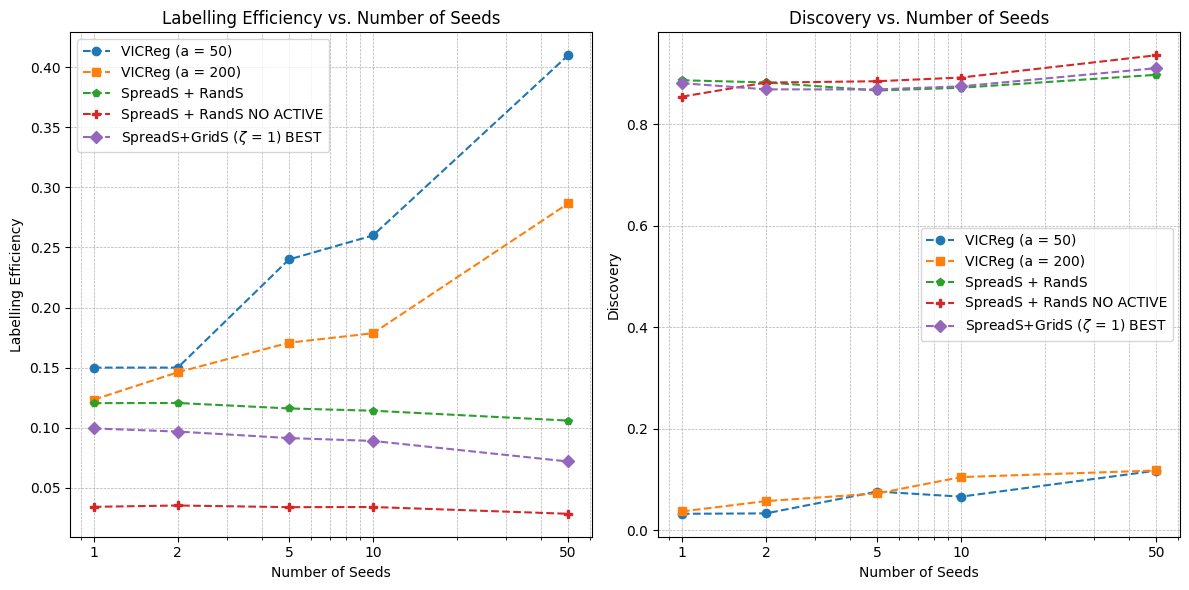

In [231]:
import matplotlib.pyplot as plt

# Data for VICReg (a = 50)
seeds = [1, 2, 5, 10, 50]
le_a_50 = [0.15, 0.15, 0.24, 0.26, 0.41]
d_a_50 = [0.0323, 0.0331, 0.0761, 0.0661, 0.1173]

# Data for VICReg (a = 200)
le_a_200 = [0.1233, 0.1461, 0.1707, 0.1786, 0.2866]
d_a_200 = [0.0369, 0.0573, 0.0723, 0.1046, 0.1176]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Labelling Efficiency
ax1.plot(seeds, le_a_50, marker='o', linestyle='--', label='VICReg (a = 50)')
ax1.plot(seeds, le_a_200, marker='s', linestyle='--', label='VICReg (a = 200)')
ax1.plot(seeds, np.array(list(score_base_tot.values()))[:,0], marker='p', linestyle='--', label='SpreadS + RandS')
ax1.plot(seeds, np.array(list(score_elsa_noac_tot.values()))[:,0], marker='P', linestyle='--', label='SpreadS + RandS NO ACTIVE')
ax1.plot(seeds, np.array(list(score_2c_tot.values()))[:,0], marker='D', linestyle='--', label=r"SpreadS+GridS ($\zeta$ = 1) BEST")


ax1.set_xscale('log')
ax1.set_xticks(seeds)
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax1.set_xlabel('Number of Seeds')
ax1.set_ylabel('Labelling Efficiency')
ax1.set_title('Labelling Efficiency vs. Number of Seeds')
ax1.grid(True, which="both", linestyle='--', linewidth=0.5)
ax1.legend()

# Plot Discovery
ax2.plot(seeds, d_a_50, marker='o', linestyle='--', label='VICReg (a = 50)')
ax2.plot(seeds, d_a_200, marker='s', linestyle='--', label='VICReg (a = 200)')
ax2.plot(seeds, np.array(list(score_base_tot.values()))[:,1], marker='p', linestyle='--', label='SpreadS + RandS')
ax2.plot(seeds, np.array(list(score_elsa_noac_tot.values()))[:,1], marker='P', linestyle='--', label='SpreadS + RandS NO ACTIVE')
ax2.plot(seeds, np.array(list(score_2c_tot.values()))[:,1], marker='D', linestyle='--', label=r"SpreadS+GridS ($\zeta$ = 1) BEST")

ax2.set_xscale('log')
ax2.set_xticks(seeds)
ax2.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax2.set_xlabel('Number of Seeds')
ax2.set_ylabel('Discovery')
ax2.set_title('Discovery vs. Number of Seeds')
ax2.grid(True, which="both", linestyle='--', linewidth=0.5)
ax2.legend()

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
# plt.show()
plt.savefig("Plot1.pdf")